In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels import api as sm
from statsmodels.graphics import tsaplots

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:.2f}'.format

### Временные ряды

Данные можно скачать [тут](https://www.kaggle.com/datasets/podsyp/time-series-starter-dataset)  
Состав таблицы:
- месяц
- доход
- число продаж
- средняя стоимость продажи
- средний доход за год

Считываем данные привычным способом

In [2]:
data = pd.read_csv('Month_Value_1.csv')
display(data.head(20))

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,16010072.12,12729.00,1257.76,30024676.00
1,01.02.2015,15807587.45,11636.00,1358.51,30024676.00
2,01.03.2015,22047146.02,15922.00,1384.70,30024676.00
3,01.04.2015,18814583.29,15227.00,1235.61,30024676.00
4,01.05.2015,14021479.61,8620.00,1626.62,30024676.00
5,01.06.2015,16783928.52,13160.00,1275.37,30024676.00
6,01.07.2015,19161892.19,17254.00,1110.58,30024676.00
7,01.08.2015,15204984.30,8642.00,1759.43,30024676.00
8,01.09.2015,20603939.98,16144.00,1276.26,30024676.00
9,01.10.2015,20992874.78,18135.00,1157.59,30024676.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


Имеем пропуски. Их 28, наверное, они все в конце.

In [4]:
display(data.tail(40))

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
56,01.09.2019,48526260.13,23253.00,2086.88,29878525.00
57,01.10.2019,44160416.18,26603.00,1659.98,29878525.00
58,01.11.2019,36374956.49,21987.00,1654.38,29878525.00
59,01.12.2019,58756473.66,38069.00,1543.42,29878525.00
60,01.01.2020,56288300.87,27184.00,2070.64,29044998.00
61,01.02.2020,40225243.26,23509.00,1711.06,29044998.00
62,01.03.2020,50022165.23,32569.00,1535.88,29044998.00
63,01.04.2020,52320692.94,26615.00,1965.83,29044998.00
64,01.05.2020,NaN,NaN,NaN,NaN
65,01.06.2020,NaN,NaN,NaN,NaN


Пока что избавимся от них

In [5]:
data.dropna(inplace=True)

Изменим тип данных Period с object на datetime64.

In [6]:
data['Period'] = pd.to_datetime(data['Period'], format="%d.%m.%Y")

Посмотрим обновленную информацию о данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Period                                    64 non-null     datetime64[ns]
 1   Revenue                                   64 non-null     float64       
 2   Sales_quantity                            64 non-null     float64       
 3   Average_cost                              64 non-null     float64       
 4   The_average_annual_payroll_of_the_region  64 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.0 KB


Установим индекс таблицы равным Period

In [8]:
data.set_index('Period', inplace=True)

Чтобы проверить, в хронологическом ли порядке расположены даты, посмотрим атрибут индекса таблицы is_monotonic_increasing. Если порядок соблюдён, атрибут вернёт True, если нет — False.

In [9]:
data.index.is_monotonic_increasing

True

Оставим только данные с 2015 по 2018 год включительно

In [10]:
data = data['2015':'2018']
print(data.index.min(), data.index.max())

2015-01-01 00:00:00 2018-12-01 00:00:00


Построим график продаж

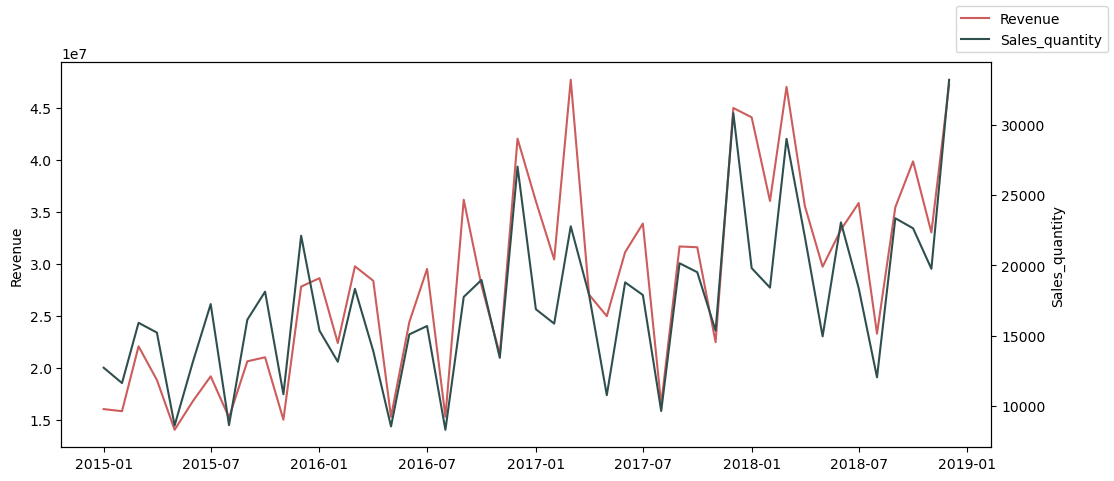

In [11]:
fig, ax = plt.subplots(1, 1, figsize=[12, 5])
ax.plot(data['Revenue'], c='indianred', label='Revenue')
ax.set_ylabel('Revenue')
ax2 = ax.twinx()
ax2.plot(data['Sales_quantity'], c='darkslategrey', label='Sales_quantity')
ax2.set_ylabel('Sales_quantity')
fig.legend();

Чтобы поменять интервал и сгруппировать значения, вызовем функцию resample(). В аргументе укажем новый интервал. Функция resample() похожа на groupby(). После группировки вызовают агрегирующие функции mean(), max() и другие для агрегации значений.  
Сгруппируем данные по кварталам. И посчитаем суммарные продажи.

In [12]:
data_quart_sum = data.resample('1Q').sum()
data_quart_sum.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-03-31,53864805.59,40287.00,4000.97,90074028.00
2015-06-30,49619991.43,37007.00,4137.60,90074028.00
2015-09-30,54970816.47,42040.00,4146.27,90074028.00
2015-12-31,63778052.08,51089.00,3797.42,90074028.00
2016-03-31,80707269.13,46857.00,5183.61,83485713.00


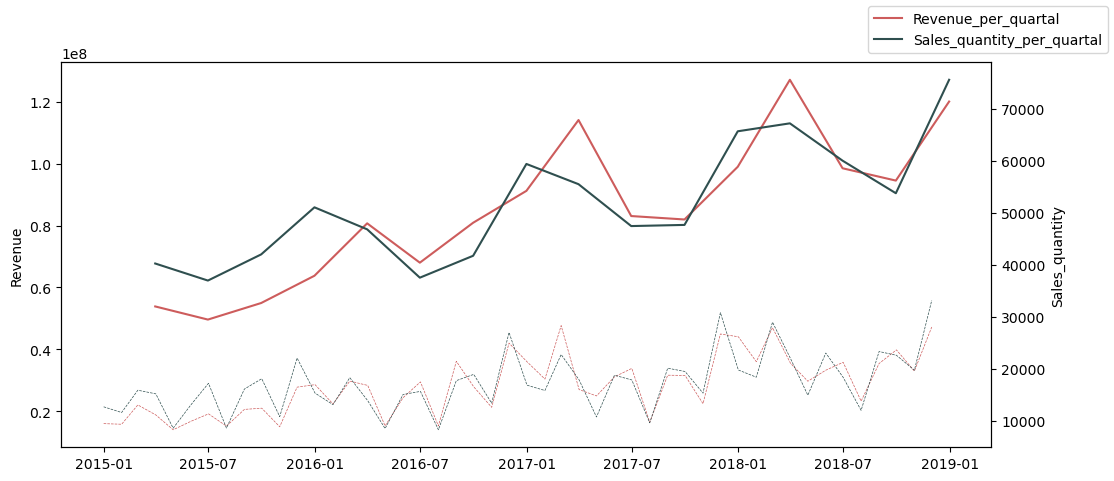

In [13]:
fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(data['Revenue'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(data_quart_sum['Revenue'], c='indianred', label='Revenue_per_quartal')
ax.set_ylabel('Revenue')

ax2 = ax.twinx()
ax2.plot(data['Sales_quantity'], c='darkslategrey', linewidth=0.5, linestyle='--')
ax2.plot(data_quart_sum['Sales_quantity'], c='darkslategrey', label='Sales_quantity_per_quartal')
ax2.set_ylabel('Sales_quantity')

fig.legend();

В Pandas скользящее среднее вычисляют в два этапа:
- Вызовом функции rolling() создают скользящее окно. В аргументе указывают его размер
- Для агрегации значений вызывают функцию mean()

In [14]:
data_rolling_mean = data[['Revenue', 'Sales_quantity']].rolling(3).mean()

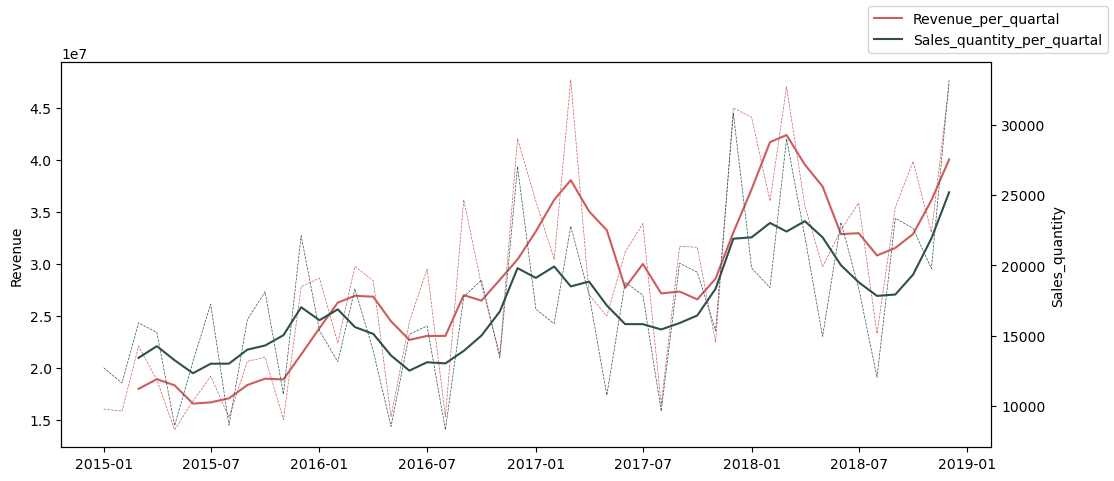

In [15]:
fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(data['Revenue'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(data_rolling_mean['Revenue'], c='indianred', label='Revenue_per_quartal')
ax.set_ylabel('Revenue')

ax2 = ax.twinx()
ax2.plot(data['Sales_quantity'], c='darkslategrey', linewidth=0.5, linestyle='--')
ax2.plot(data_rolling_mean['Sales_quantity'], c='darkslategrey', label='Sales_quantity_per_quartal')
ax2.set_ylabel('Sales_quantity')

fig.legend();

Функция seasonal_decompose раскладывает временной ряд на три составляющие: тренд, сезонность и остаток. Это компонента, которая не объясняется трендом и сезонностью, это шум.

In [16]:
decomposed = seasonal_decompose(data['Sales_quantity']) 

Функция seasonal_decompose() принимает временной ряд, а возвращает объект структуры DecomposeResult. В нём есть нужные атрибуты:
- decomposed.trend — тренд;
- decomposed.seasonal — сезонная составляющая;
- decomposed.resid — остаток декомпозиции.

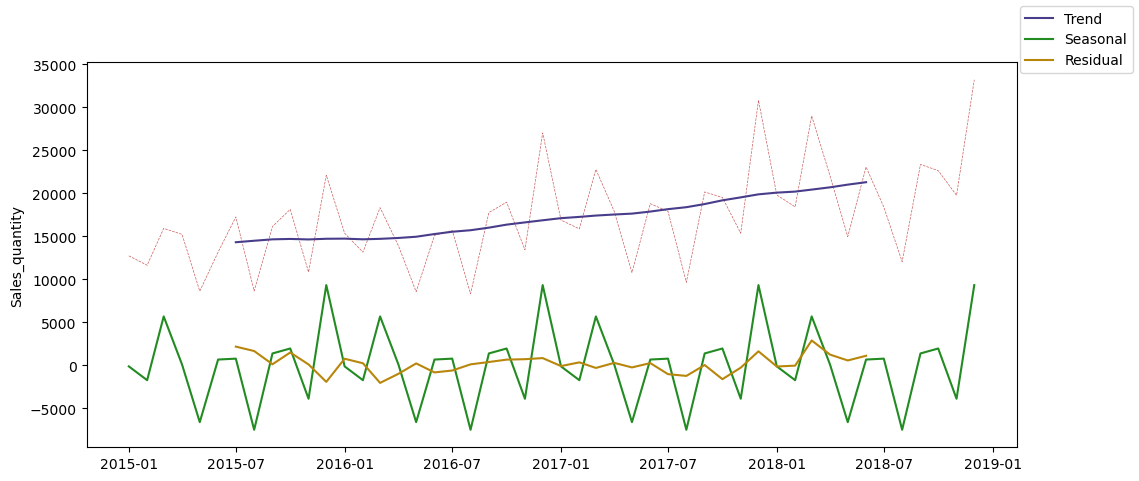

In [17]:
fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(data['Sales_quantity'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(decomposed.trend, c='darkslateblue', label='Trend')
ax.plot(decomposed.seasonal, c='forestgreen', label='Seasonal')
ax.plot(decomposed.resid, c='darkgoldenrod', label='Residual')
ax.set_ylabel('Sales_quantity')

fig.legend();

Для поиска разностей временного ряда применяется метод shift(). Все значения он сдвигает вдоль временной оси на один шаг вперёд. Последнее значение ряда пропадает: его сдвигать некуда. На месте нулевого — NaN, потому что для него значения нет. Используем аргумент fill_value, чтобы заполнить недостающие значения.

In [18]:
sales_diffs = data['Sales_quantity'] - data['Sales_quantity'].shift(fill_value=0)

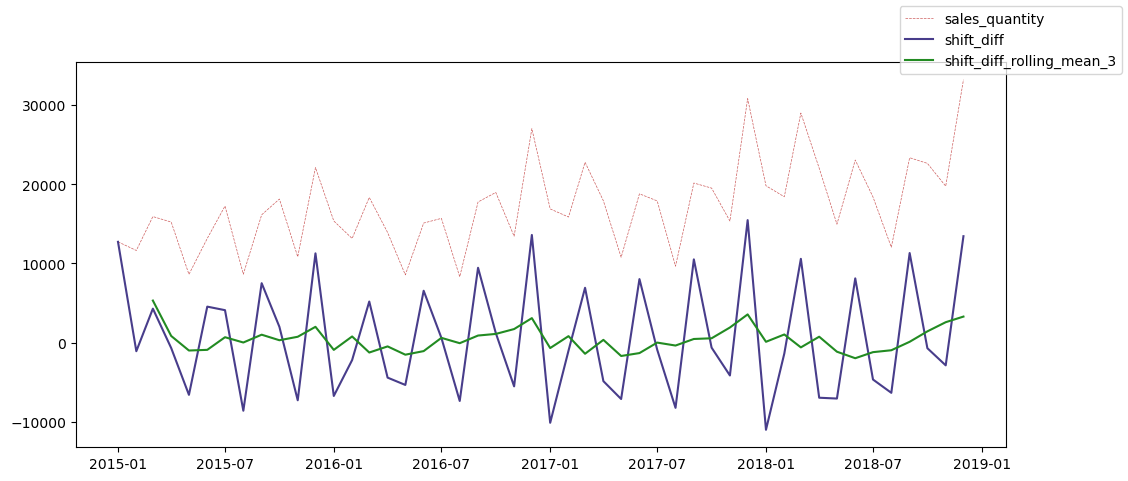

In [19]:
fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(data['Sales_quantity'], c='indianred', linewidth=0.5, linestyle='--', label='sales_quantity')
ax.plot(sales_diffs, c='darkslateblue', label='shift_diff')
ax.plot(sales_diffs.rolling(3).mean(), c='forestgreen', label='shift_diff_rolling_mean_3')

fig.legend();

Мы можем рассчитать автокорреляцию для каждого лага во временном ряду, используя функцию acf() из библиотеки statsmodels

In [20]:
data['Sales_quantity'].shape

(48,)

In [21]:
acf = sm.tsa.acf(data['Sales_quantity'])
acf.shape

(17,)

Мы можем построить функцию автокорреляции для временного ряда в Python, используя функцию tsaplots.plot_acf() из библиотеки statsmodels

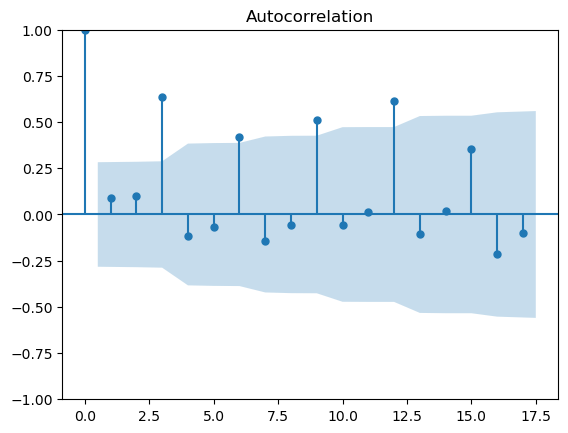

In [22]:
fig = tsaplots.plot_acf(data['Sales_quantity'])
plt.show() 

### Прогнозирование временных рядов

Функция train_test_split() из модуля sklearn.model_selection по умолчанию перемешивает данные. Поэтому укажем аргумент shuffle равным False, чтобы разделить данные корректно.

In [23]:
train, test = train_test_split(data[['Sales_quantity']], shuffle=False, test_size=0.2, random_state=123)

#### Простая модель

Оценим модель предыдущим значением ряда.

In [24]:
pred_previous = test.shift(1).fillna(train.iloc[-1, 0])
print("MAE:", mean_absolute_error(test, pred_previous))

MAE: 7210.3


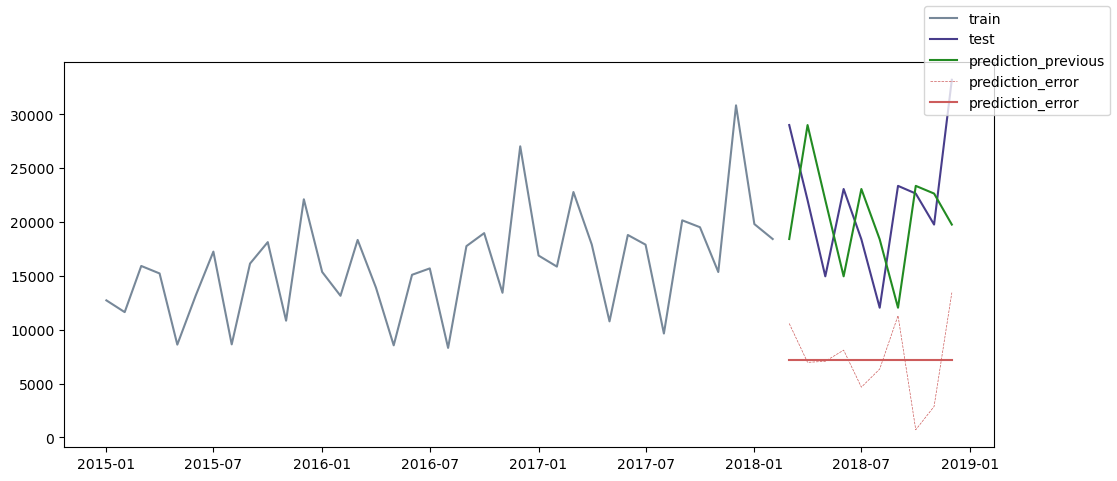

In [25]:
fig, ax = plt.subplots(1, 1, figsize=[12, 5])

error = abs(test['Sales_quantity'] - pred_previous['Sales_quantity'])
error_mean = pd.Series([error.mean()] * error.shape[0])
error_mean.index = test.index

ax.plot(train, c='lightslategrey', label='train')
ax.plot(test, c='darkslateblue', label='test')
ax.plot(pred_previous, c='forestgreen', label='prediction_previous')
ax.plot(error, c='indianred', linestyle='--', label='prediction_error', linewidth=0.5)
ax.plot(error_mean, c='indianred', label='prediction_error')

fig.legend();

#### Линейная модель

Для создания признаков реализуем функцию make_features, чтобы прибавить к таблице три новых календарных признака: год, месяц, и квартал.   
Также будем вычислять отстающие значения, варьируя их количество аргументом функции max_lag, который задаст максимальный размер отставания.  
Наконец, добавим расчет скользящего среднего, размер окна которого будет задаваться параметром rolling_mean_size.

In [26]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['quarter'] = data.index.quarter
    
    for i in range(1, max_lag + 1):
        data[f'lag_{i}'] = data['Sales_quantity'].shift(i)
        
    data['rolling_mean'] = data['Sales_quantity'].rolling(rolling_mean_size).mean()
    data['rolling_mean'] = data['rolling_mean'].shift(1)
    
    return data

In [27]:
data_with_features = make_features(data[['Sales_quantity']].copy(), 3, 3)
data_with_features.head()

,Sales_quantity,year,month,quarter,lag_1,lag_2,lag_3,rolling_mean
Period,,,,,,,,
2015-01-01,12729.00,2015,1,1,NaN,NaN,NaN,NaN
2015-02-01,11636.00,2015,2,1,12729.00,NaN,NaN,NaN
2015-03-01,15922.00,2015,3,1,11636.00,12729.00,NaN,NaN
2015-04-01,15227.00,2015,4,2,15922.00,11636.00,12729.00,13429.00
2015-05-01,8620.00,2015,5,2,15227.00,15922.00,11636.00,14261.67


In [28]:
train, test = train_test_split(data_with_features.dropna(), shuffle=False, test_size=0.2)
train = train.dropna()

train_target = train['Sales_quantity']
train_features = train.drop(['Sales_quantity'], axis=1)
test_target = test['Sales_quantity']
test_features = test.drop(['Sales_quantity'], axis=1)

scaler = StandardScaler().fit(train_features)
train_features_norm = scaler.transform(train_features)
test_features_norm = scaler.transform(test_features)

model = LinearRegression()
model.fit(train_features_norm, train_target)

train_prediction = pd.Series(model.predict(train_features_norm))
train_prediction.index = train_features.index
test_prediction = pd.Series(model.predict(test_features_norm))
test_prediction.index = test_features.index

print("MAE обучающей выборки:" ,mean_absolute_error(train_target, train_prediction))
print("MAE тестовой выборки: " ,mean_absolute_error(test_target, test_prediction))

MAE обучающей выборки: 1866.4232857157779
MAE тестовой выборки:  3861.6717085935798


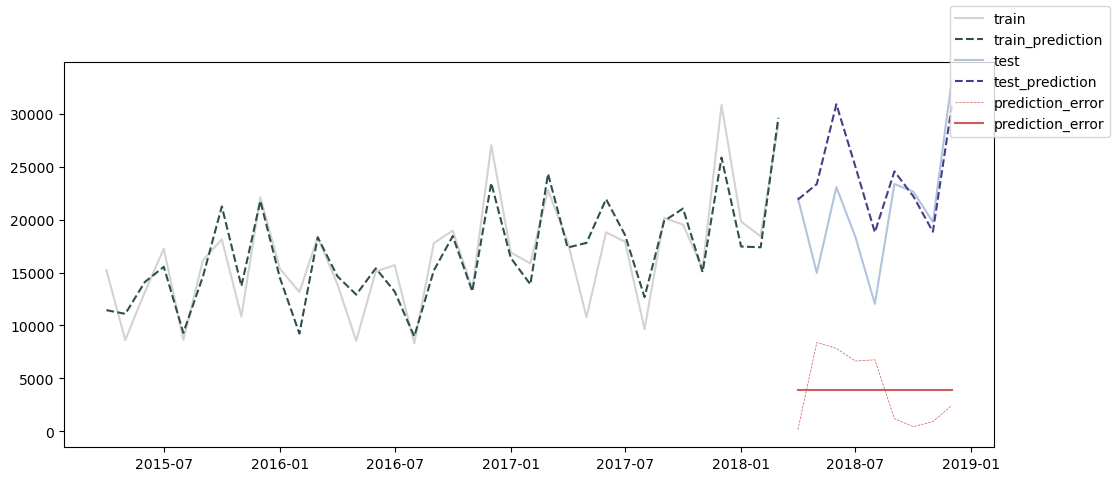

In [29]:
fig, ax = plt.subplots(1, 1, figsize=[12, 5])

error = abs(test['Sales_quantity'] - test_prediction)
error_mean = pd.Series([error.mean()] * error.shape[0])
error_mean.index = test.index

ax.plot(train_target, c='lightgrey', label='train')
ax.plot(train_prediction, c='darkslategrey', label='train_prediction', linestyle='--')
ax.plot(test_target, c='lightsteelblue', label='test')
ax.plot(test_prediction, c='darkslateblue', label='test_prediction', linestyle='--')
ax.plot(error, c='indianred', linestyle='--', label='prediction_error', linewidth=0.5)
ax.plot(error_mean, c='indianred', label='prediction_error')

fig.legend();

In [30]:
pd.DataFrame(zip(train_features.columns, abs(model.coef_)), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)

,feature,importance
2,quarter,6462.77
5,lag_3,4403.33
1,month,3347.79
6,rolling_mean,2559.57
0,year,903.50
3,lag_1,867.50
4,lag_2,819.51
